In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [4]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [5]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e0fbab22430929e6570d1313412585592337a58b73c07f97616b017af26f0356
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [6]:
import wget
wget.download(link)

'traffic-signs-data (3).zip'

In [7]:
data ="./"

In [8]:
!unzip -q traffic-signs-data.zip

replace test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
train_link = data +"train.p"
valid_link = data +"valid.p"
test_link = data +"test.p"

In [10]:
import pickle

In [11]:
with open(train_link, mode ="rb") as f:
  train = pickle.load(f)

In [12]:
with open(valid_link, mode ="rb") as f:
  valid = pickle.load(f)

In [13]:
with open(test_link, mode ="rb") as f:
  test = pickle.load(f)

In [14]:
trainX = train["features"]
trainY = train["labels"]

Tẩt cả các ảnh thì có 4 chiều

In [15]:
trainX.shape

(34799, 32, 32, 3)

Một ảnh thì là 3 chiều

In [16]:
trainX[0].shape

(32, 32, 3)

In [17]:
import matplotlib.pyplot as plt


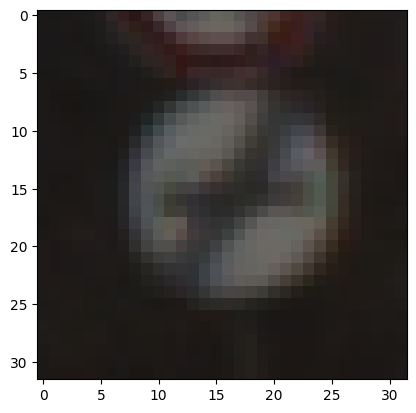

In [18]:
plt.imshow(trainX[1])

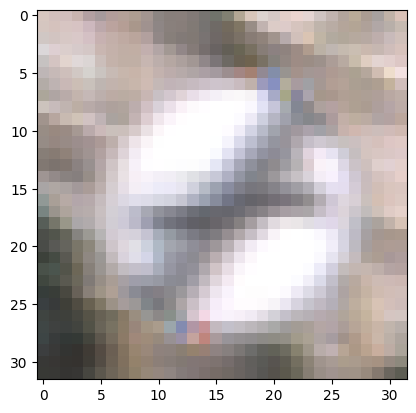

In [19]:
plt.imshow(trainX[50])

In [20]:
trainY[50]

41

In [21]:
classNames= {
  0: "Speed limit (20km/h)",
  1: "Speed limit (30km/h)",
  2: "Speed limit (50km/h)",
  3: "Speed limit (60km/h)",
  4: "Speed limit (70km/h)",
  5: "Speed limit (80km/h)",
  6: "End of speed limit (80km/h)",
  7: "Speed limit (100km/h)",
  8: "Speed limit (120km/h)",
  9: "No passing",
  10: "No passing for vehicles over 3.5 metric tons",
  11: "Right-of-way at the next intersection",
  12: "Priority road",
  13: "Yield",
  14: "Stop",
  15: "No vehicles",
  16: "Vehicles over 3.5 metric tons prohibited",
  17: "No entry",
  18: "General caution",
  19: "Dangerous curve to the left",
  20: "Dangerous curve to the right",
  21: "Double curve",
  22: "Bumpy road",
  23: "Slippery road",
  24: "Road narrows on the right",
  25: "Road work",
  26: "Traffic signals",
  27: "Pedestrians",
  28: "Children crossing",
  29: "Bicycles crossing",
  30: "Beware of ice/snow",
  31: "Wild animals crossing",
  32: "End of all speed and passing limits",
  33: "Turn right ahead",
  34: "Turn left ahead",
  35: "Ahead only",
  36: "Go straight or right",
  37: "Go straight or left",
  38: "Keep right",
  39: "Keep left",
  40: "Roundabout mandatory",
  41: "End of no passing",
  42: "End of no passing by vehicles over 3.5 metric tons",
}

In [22]:
 # label of 50th signal
 classNames[trainY[50]]

'End of no passing'

### Bởi vì những ảnh giống nhau đang được sắp xếp đứng liền nhau nên ta cần shuffle lại thứ tự để đảm bảo tính tổng quát hoá

In [23]:
from sklearn.utils import shuffle

In [24]:
#shuffle label and data
trainX, trainY = shuffle(trainX,trainY)

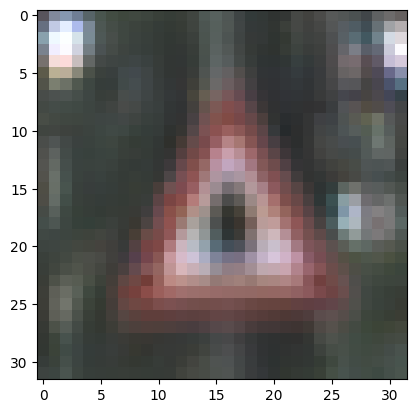

In [25]:
plt.imshow(trainX[1])

The first pic has changed

In [26]:
classNames[trainY[50]]

'No passing for vehicles over 3.5 metric tons'

In [27]:
validX = valid["features"]
validY = valid["labels"]

In [28]:
testX = test["features"]
testY = test["labels"]

In [29]:
# chuan hoa bang cach chia cho 255 vi moi pixel chay tu 0 den 255
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [30]:
from sklearn.preprocessing import LabelBinarizer

In [31]:
lb = LabelBinarizer()

In [32]:
trainY = lb.fit_transform(trainY)

In [33]:
validY = lb.fit_transform(validY)

In [34]:
valid["labels"][0]

41

In [35]:
# Ảnh đầu tiên có nhãn 41
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [37]:
model = Sequential()

In [38]:
width = 32
height = 32
classes = 43

In [39]:
shape = (width, height, 3)

In [40]:
model.add(Conv2D(32,(3,3),padding = "same",input_shape = shape))

In [41]:
model.add(Activation("relu"))

Hàm activation chỉ dùng để biển đổi chứ k phải để học

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.add(BatchNormalization())

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
Total params: 1024 (4.00 KB)
Trainable params: 960 (3.75 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


# Thêm lớp

In [45]:
model.add(Conv2D(32,(3,3),padding = "same"))

In [46]:
model.add(Activation("relu"))

In [47]:
model.add(BatchNormalization())

In [48]:
model.add(MaxPooling2D(pool_size =(2,2)))

### MaxPooling chỉ chọn ra giá trị lớn nhất mà k học gì cả nên param =0

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

# Add more layers

In [50]:
model.add(Conv2D(64,(3,3),padding = "same"))

In [51]:
model.add(Activation("relu"))

In [52]:
model.add(BatchNormalization())

In [53]:
model.add(Flatten())

In [54]:
model.add(Dense(512))

In [55]:
model.add(Activation("relu"))

In [56]:
model.add(BatchNormalization())

In [57]:
model.add(Dense(43)) ## or model.add(Dense(classes))

In [58]:
model.add(Activation("softmax"))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [60]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range = 0.15, width_shift_range= 0.2, height_shift_range = 0.2, horizontal_flip= True)

In [61]:
learning_rate = 0.01

In [62]:
epochs = 10
batch_size = 64

In [63]:
opt = SGD(learning_rate = learning_rate, momentum=0.9)

In [64]:
model.compile(optimizer= opt, loss = "categorical_crossentropy", metrics =['accuracy'])

In [65]:
print("Start training")
H = model.fit_generator(aug.flow(trainX,trainY,batch_size=batch_size), validation_data =(validX,validY), steps_per_epoch = trainX.shape[0]//batch_size,epochs = epochs, verbose = 1)

Start training
Epoch 1/10


<ipython-input-65-fd6916a7fb03>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX,trainY,batch_size=batch_size), validation_data =(validX,validY), steps_per_epoch = trainX.shape[0]//batch_size,epochs = epochs, verbose = 1)


543/543 [==============================] - 134s 245ms/step - loss: 1.9833 - accuracy: 0.4256 - val_loss: 2.2517 - val_accuracy: 0.4045
Epoch 2/10
543/543 [==============================] - 126s 233ms/step - loss: 0.8663 - accuracy: 0.7145 - val_loss: 1.4157 - val_accuracy: 0.5998
Epoch 3/10
543/543 [==============================] - 128s 236ms/step - loss: 0.4867 - accuracy: 0.8394 - val_loss: 1.1683 - val_accuracy: 0.6803
Epoch 4/10
543/543 [==============================] - 127s 233ms/step - loss: 0.3057 - accuracy: 0.9011 - val_loss: 1.3077 - val_accuracy: 0.6603
Epoch 5/10
543/543 [==============================] - 142s 262ms/step - loss: 0.2180 - accuracy: 0.9302 - val_loss: 1.0302 - val_accuracy: 0.7381
Epoch 6/10
543/543 [==============================] - 135s 248ms/step - loss: 0.1741 - accuracy: 0.9438 - val_loss: 0.8759 - val_accuracy: 0.7735
Epoch 7/10
543/543 [==============================] - 129s 238ms/step - loss: 0.1376 - accuracy: 0.9563 - val_loss: 0.8575 - val_accura

In [69]:
testX.shape

(12630, 32, 32, 3)

In [72]:
testX[1:2]

array([[[[0.23137255, 0.2745098 , 0.23921569],
         [0.34117647, 0.31372549, 0.24705882],
         [0.36078431, 0.31764706, 0.24705882],
         ...,
         [0.30196078, 0.25098039, 0.2627451 ],
         [0.27843137, 0.25490196, 0.2627451 ],
         [0.29019608, 0.27058824, 0.26666667]],

        [[0.23137255, 0.26666667, 0.22745098],
         [0.36862745, 0.3254902 , 0.25490196],
         [0.37254902, 0.31372549, 0.24313725],
         ...,
         [0.30196078, 0.25098039, 0.25882353],
         [0.36078431, 0.27058824, 0.2745098 ],
         [0.33333333, 0.26666667, 0.26666667]],

        [[0.21960784, 0.26666667, 0.22745098],
         [0.35294118, 0.32941176, 0.2627451 ],
         [0.37254902, 0.32156863, 0.25098039],
         ...,
         [0.28235294, 0.25490196, 0.25882353],
         [0.31372549, 0.2627451 , 0.27058824],
         [0.30980392, 0.27058824, 0.2745098 ]],

        ...,

        [[0.18823529, 0.18431373, 0.16862745],
         [0.30980392, 0.26666667, 0.22352941]

In [85]:
import numpy as np

In [74]:
model.save("NguyetNet.h5")

In [77]:
saved_model = tf.keras.models.load_model("NguyetNet.h5")

In [78]:
pred = saved_model.predict(testX[1:2]) # THE 1ST PICTURE

1/1 [==============================] - 0s 189ms/step


In [83]:
testX[1:2]

(1, 32, 32, 3)

In [81]:
pred

array([[1.75025314e-04, 9.99499917e-01, 9.43317718e-05, 8.18325191e-07,
        8.74957550e-07, 2.15079606e-04, 1.04758705e-07, 6.07104880e-07,
        3.09200209e-06, 1.25652738e-10, 9.38167943e-09, 9.01214747e-08,
        1.95678354e-08, 8.39753334e-09, 1.72573262e-08, 4.01469151e-08,
        5.43996748e-07, 2.94871544e-10, 4.19154958e-06, 3.24311200e-09,
        1.03338471e-09, 3.65601807e-08, 1.54159874e-09, 2.48696341e-10,
        5.80556474e-08, 3.18032733e-07, 1.92182235e-08, 1.82283788e-08,
        5.65276650e-07, 2.08112971e-09, 5.26575761e-09, 3.03427977e-10,
        1.27883260e-09, 1.76978943e-09, 5.64891814e-11, 1.37073096e-06,
        1.21577301e-07, 2.46600803e-06, 2.10312265e-07, 4.23399715e-09,
        1.38378784e-08, 1.19818999e-08, 8.79132378e-10]], dtype=float32)

In [86]:
pred = np.argmax(pred)

In [87]:
sign = classNames[pred]

In [88]:
sign

'Speed limit (30km/h)'

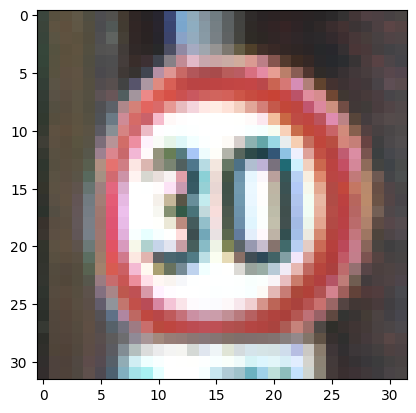

In [90]:
plt.imshow(test['features'][1])

In [95]:
pred_100th = saved_model.predict(testX[93:94]) # the 93th pic

1/1 [==============================] - 0s 19ms/step


In [96]:
pred_100th = np.argmax(pred_100th) # FIND THE POSITION OF LARGEST PROBABILITY

In [97]:
final_100th = classNames[pred_100th]

In [98]:
final_100th

'Stop'

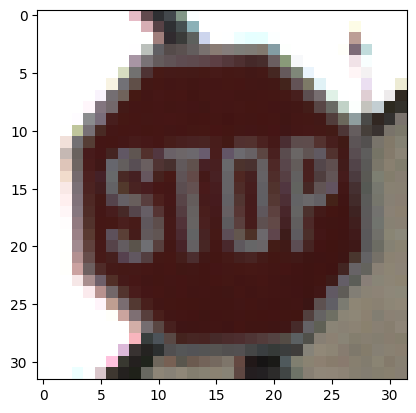

In [99]:
plt.imshow(test['features'][93])